# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

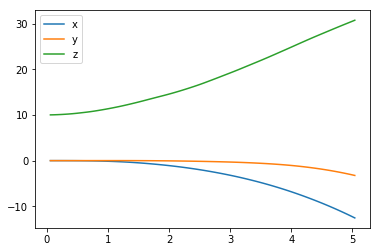

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

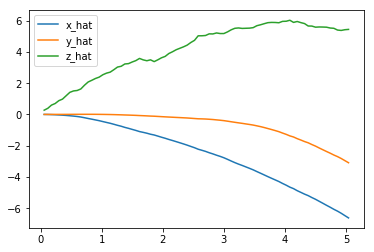

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

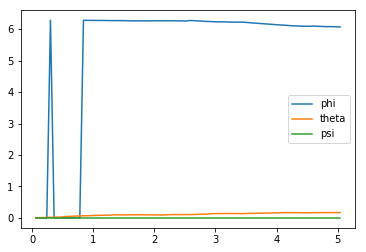

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

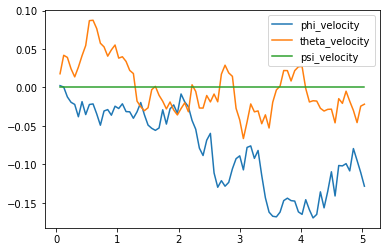

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

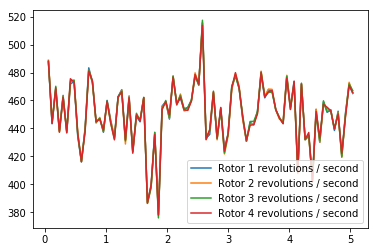

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.53649978  -3.24410605  30.71542008   6.06936602   0.16958969   0.        ]
[-6.6227349  -3.09173665  5.44025676]
[-0.12831898 -0.02170446  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.862 (best =  -0.085), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [12]:
## TODO: Train your agent here.
import sys
import pandas as pd
# from agents.actor import Actor
from agents.agent import Agent
import math
from Landing_Task import Landing_Task

num_episodes = 1000
target_pos = np.array([0., 0., 0.])
init_pose = np.array([0.,0.,10., 0., 0., 0.]) #Start in the sky

task = Landing_Task(target_pos=target_pos, init_pose=init_pose)
agent = Agent(task) 

best_reward = -float("inf")
best_episode_reward = -float("inf")
reward_sum = 0
labels = ['episode','sum']
results = {x : [] for x in labels}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    best_episode_reward = -float("inf")
    reward_sum = 0
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        reward_sum += reward
        if reward > best_episode_reward:
            best_episode_reward = reward
        if done:
            if best_episode_reward > best_reward:
                best_reward = best_episode_reward
            to_write = [i_episode] + [reward_sum]
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            print("\rEpisode = {:4d} Reward = {:4f} Best Reward = {:4f} Cum Reward = {:4f} \n".format(i_episode, best_episode_reward, best_reward, reward_sum), task.getPose(), "\n", end="")   # [debug]
            break
    sys.stdout.flush()

Episode =    1 Reward = 0.132820 Best Reward = 0.132820 Cum Reward = 1.060708 
 [ 4.77806905 -2.5128811   0.          5.47068197  4.04751261  0.        ] 
Episode =    2 Reward = 0.462814 Best Reward = 0.462814 Cum Reward = 2.281220 
 [-1.38364894 -0.65643841  0.          4.09077254  3.51565512  0.        ] 
Episode =    3 Reward = 0.310341 Best Reward = 0.462814 Cum Reward = 2.122622 
 [-0.80875975  0.29314347  0.          2.97689407  1.87995612  0.        ] 
Episode =    4 Reward = 0.330260 Best Reward = 0.462814 Cum Reward = 1.341408 
 [ 2.87546804  1.53759758  0.          3.51578319  2.25276444  0.        ] 
Episode =    5 Reward = 0.199668 Best Reward = 0.462814 Cum Reward = 1.742088 
 [ 2.84535391 -3.21818572  0.          3.12455415  1.1245418   0.        ] 
Episode =    6 Reward = 0.066369 Best Reward = 0.462814 Cum Reward = 0.381859 
 [ 27.40633216  -3.33106141   0.           0.09168953   3.68886278   0.        ] 
Episode =    7 Reward = 0.587104 Best Reward = 0.587104 Cum Rewa

Episode =   51 Reward = 0.285043 Best Reward = 1.651647 Cum Reward = 6.672495 
 [  8.04520111e-06   3.50337598e+01   7.07501910e+01   1.43934911e+00
   3.76665578e-05   0.00000000e+00] 
Episode =   52 Reward = 0.285112 Best Reward = 1.651647 Cum Reward = 8.713413 
 [ -3.65314927e-03   2.39680930e-01   8.28751692e+01   2.77189087e-01
   1.20781645e-04   0.00000000e+00] 
Episode =   53 Reward = 0.285110 Best Reward = 1.651647 Cum Reward = 5.873813 
 [  7.84734190e-04   4.72573362e+01   6.06737155e+01   1.74342645e+00
   2.41293127e-06   0.00000000e+00] 
Episode =   54 Reward = 0.285118 Best Reward = 1.651647 Cum Reward = 8.715194 
 [  4.32413048e-04  -4.83974763e+00   8.26253868e+01   7.75759592e-02
   1.14804740e-05   0.00000000e+00] 
Episode =   55 Reward = 0.285118 Best Reward = 1.651647 Cum Reward = 7.810591 
 [ -1.16049782e-03   1.73320198e+01   7.98107314e+01   6.41461197e-01
   1.14800872e-04   0.00000000e+00] 
Episode =   56 Reward = 0.285104 Best Reward = 1.651647 Cum Reward = 8

Episode =   96 Reward = 0.285119 Best Reward = 1.651647 Cum Reward = 7.948166 
 [ -1.03493347e-03   1.82064294e+01   8.02120018e+01   2.16593291e-01
   2.70474360e-05   0.00000000e+00] 
Episode =   97 Reward = 0.285100 Best Reward = 1.651647 Cum Reward = 7.899361 
 [  1.81548155e-03  -1.76786874e+01   7.99279870e+01   5.80423419e+00
   6.28311452e+00   0.00000000e+00] 
Episode =   98 Reward = 0.285118 Best Reward = 1.651647 Cum Reward = 8.810623 
 [ -6.21151434e-03   2.23432296e+00   8.27984179e+01   6.16126848e+00
   2.98665788e-04   0.00000000e+00] 
Episode =   99 Reward = 0.285105 Best Reward = 1.651647 Cum Reward = 7.768219 
 [  6.27643742e-03   5.49933547e+00   8.41523297e+01   1.33370743e+00
   6.28297601e+00   0.00000000e+00] 
Episode =  100 Reward = 0.285109 Best Reward = 1.651647 Cum Reward = 8.554157 
 [ -1.50425454e-03   7.20567380e+00   8.25723518e+01   3.03084596e-01
   9.06541800e-05   0.00000000e+00] 
Episode =  101 Reward = 0.285082 Best Reward = 1.651647 Cum Reward = 6

Episode =  141 Reward = 0.285080 Best Reward = 1.651647 Cum Reward = 8.623715 
 [ -5.12135408e-03   6.24237477e+00   8.26218651e+01   6.17742660e+00
   2.16136688e-04   0.00000000e+00] 
Episode =  142 Reward = 0.285119 Best Reward = 1.651647 Cum Reward = 7.003938 
 [  1.31447939e-03   2.89287303e+01   7.43658170e+01   1.06731243e+00
   6.28306752e+00   0.00000000e+00] 
Episode =  143 Reward = 0.285095 Best Reward = 1.651647 Cum Reward = 7.255725 
 [  2.03776771e-03   3.07797235e+01   7.59654913e+01   4.75566255e-01
   6.28317003e+00   0.00000000e+00] 
Episode =  144 Reward = 0.285038 Best Reward = 1.651647 Cum Reward = 6.259775 
 [ -1.27695244e-03   4.20927822e+01   6.55654194e+01   1.08100108e+00
   5.66837670e-05   0.00000000e+00] 
Episode =  145 Reward = 0.285081 Best Reward = 1.651647 Cum Reward = 7.404402 
 [ -4.78391177e-03  -2.12774609e+01   7.65575369e+01   4.90518187e+00
   2.29216927e-04   0.00000000e+00] 
Episode =  146 Reward = 0.285096 Best Reward = 1.651647 Cum Reward = 8

Episode =  186 Reward = 1.747276 Best Reward = 1.747276 Cum Reward = 6.299619 
 [ -1.19364365e-05  -2.27228912e-01   0.00000000e+00   5.85821389e+00
   6.28318211e+00   0.00000000e+00] 
Episode =  187 Reward = 1.152976 Best Reward = 1.747276 Cum Reward = 5.344171 
 [  9.85732148e-07   9.30221084e-01   0.00000000e+00   2.74961040e+00
   6.28317621e+00   0.00000000e+00] 
Episode =  188 Reward = 1.120654 Best Reward = 1.747276 Cum Reward = 5.484474 
 [  9.89726636e-07   8.98636776e-01   0.00000000e+00   6.20117611e-01
   4.44304578e-06   0.00000000e+00] 
Episode =  189 Reward = 1.815466 Best Reward = 1.815466 Cum Reward = 6.130529 
 [  4.72776688e-06  -2.26542551e-01   0.00000000e+00   5.77751624e+00
   6.28318156e+00   0.00000000e+00] 
Episode =  190 Reward = 1.493780 Best Reward = 1.815466 Cum Reward = 5.658448 
 [ -1.18790443e-05   3.66162404e-01   0.00000000e+00   5.31637967e+00
   8.26108854e-06   0.00000000e+00] 
Episode =  191 Reward = 1.090436 Best Reward = 1.815466 Cum Reward = 5

Episode =  236 Reward = 0.169789 Best Reward = 1.815466 Cum Reward = 1.527008 
 [ 0.0603765   0.65805125  0.          1.49420267  0.14003788  0.        ] 
Episode =  237 Reward = 0.611470 Best Reward = 1.815466 Cum Reward = 2.430306 
 [ 1.0254499   0.29820143  0.          0.49618913  5.9079918   0.        ] 
Episode =  238 Reward = 0.130595 Best Reward = 1.815466 Cum Reward = 1.669376 
 [-4.37557694  4.79611286  0.          0.31264029  0.47779227  0.        ] 
Episode =  239 Reward = 0.162096 Best Reward = 1.815466 Cum Reward = 1.542925 
 [ 3.10057326  0.10539733  0.          1.97399511  1.91506999  0.        ] 
Episode =  240 Reward = 0.261820 Best Reward = 1.815466 Cum Reward = 1.903242 
 [-0.27019696  4.14105332  0.          5.38700968  4.24894357  0.        ] 
Episode =  241 Reward = 0.359472 Best Reward = 1.815466 Cum Reward = 1.998652 
 [-0.87537787  0.65394844  0.          4.71036975  4.15929644  0.        ] 
Episode =  242 Reward = 0.351807 Best Reward = 1.815466 Cum Reward = 2

Episode =  289 Reward = 0.089485 Best Reward = 1.815466 Cum Reward = 0.876151 
 [-1.63078525  0.31607505  0.          6.24073416  4.63141587  0.        ] 
Episode =  290 Reward = 0.181897 Best Reward = 1.815466 Cum Reward = 1.397439 
 [ 1.62051483  1.70244257  0.          3.29366795  4.44384471  0.        ] 
Episode =  291 Reward = 0.152763 Best Reward = 1.815466 Cum Reward = 1.155019 
 [ 2.96029689 -1.3971573   0.          1.19487018  3.77025886  0.        ] 
Episode =  292 Reward = 0.136300 Best Reward = 1.815466 Cum Reward = 1.290964 
 [ 2.00001865 -1.57383145  0.          4.00093814  3.39922817  0.        ] 
Episode =  293 Reward = 0.127458 Best Reward = 1.815466 Cum Reward = 1.092882 
 [-1.37765654  5.41519476  0.          2.12597233  0.20849781  0.        ] 
Episode =  294 Reward = 0.195709 Best Reward = 1.815466 Cum Reward = 1.646380 
 [ 1.61683199  0.02952436  0.          5.32991355  4.94867374  0.        ] 
Episode =  295 Reward = 0.333552 Best Reward = 1.815466 Cum Reward = 1

Episode =  342 Reward = 0.246942 Best Reward = 1.815466 Cum Reward = 1.903277 
 [ 0.79219263  0.77693911  0.          5.89473085  1.4755171   0.        ] 
Episode =  343 Reward = 0.081514 Best Reward = 1.815466 Cum Reward = 0.622539 
 [ 1.21724697 -5.62594303  0.          2.81144163  1.94940885  0.        ] 
Episode =  344 Reward = 0.264401 Best Reward = 1.815466 Cum Reward = 2.518568 
 [ 3.30556322  0.83213255  0.          4.46293003  2.33003928  0.        ] 
Episode =  345 Reward = 0.559965 Best Reward = 1.815466 Cum Reward = 1.967714 
 [ 0.12299187 -1.51455167  0.          0.77543663  5.29125403  0.        ] 
Episode =  346 Reward = 0.532766 Best Reward = 1.815466 Cum Reward = 2.039164 
 [ 0.35955196 -1.42630441  0.          2.31021715  0.48817386  0.        ] 
Episode =  347 Reward = 0.858492 Best Reward = 1.815466 Cum Reward = 4.159688 
 [-0.17161662 -0.31141162  0.          5.86684991  0.03777177  0.        ] 
Episode =  348 Reward = 0.427925 Best Reward = 1.815466 Cum Reward = 3

Episode =  395 Reward = 0.199128 Best Reward = 1.815466 Cum Reward = 1.362698 
 [ 0.89811822 -1.46809568  0.          3.48877657  5.75823622  0.        ] 
Episode =  396 Reward = 0.663313 Best Reward = 1.815466 Cum Reward = 2.411580 
 [ 0.36650261  0.96532532  0.          4.25874332  4.93933221  0.        ] 
Episode =  397 Reward = 0.646899 Best Reward = 1.815466 Cum Reward = 2.198239 
 [-0.94946395 -0.75121969  0.          0.91666772  2.26836337  0.        ] 
Episode =  398 Reward = 0.169913 Best Reward = 1.815466 Cum Reward = 5.174964 
 [ -5.133897   -19.2414495   14.76322334   4.61077245   1.51275968   0.        ] 
Episode =  399 Reward = 0.124264 Best Reward = 1.815466 Cum Reward = 3.640263 
 [ -0.68955843  44.04330137  12.03239016   5.75506289   0.92217269   0.        ] 
Episode =  400 Reward = 0.117317 Best Reward = 1.815466 Cum Reward = 1.135412 
 [-2.3408592  -9.96157489  0.          1.89819364  4.16820715  0.        ] 
Episode =  401 Reward = 0.158107 Best Reward = 1.815466 Cu

Episode =  448 Reward = 0.225683 Best Reward = 1.815466 Cum Reward = 1.314480 
 [ 0.38044759 -2.11771905  0.          4.33787013  5.94409681  0.        ] 
Episode =  449 Reward = 0.128855 Best Reward = 1.815466 Cum Reward = 1.222968 
 [-2.37583244  0.01489364  0.          1.03845406  4.09955761  0.        ] 
Episode =  450 Reward = 0.358284 Best Reward = 1.815466 Cum Reward = 1.616058 
 [ 0.63728988 -1.10634781  0.          2.54648478  1.3741615   0.        ] 
Episode =  451 Reward = 0.802114 Best Reward = 1.815466 Cum Reward = 2.431969 
 [ 0.12924822 -0.11696889  0.          1.42950794  2.01392032  0.        ] 
Episode =  452 Reward = 0.116503 Best Reward = 1.815466 Cum Reward = 0.905786 
 [-0.31929488 -7.82928865  0.          3.78719614  1.11187982  0.        ] 
Episode =  453 Reward = 0.108480 Best Reward = 1.815466 Cum Reward = 2.767100 
 [ -0.78642162  61.86163738   0.           4.81110606   1.98200252   0.        ] 
Episode =  454 Reward = 0.146410 Best Reward = 1.815466 Cum Rewa

Episode =  500 Reward = 0.099066 Best Reward = 1.815466 Cum Reward = 0.796975 
 [  2.1912096   11.71179388   0.           2.38583584   5.11332084   0.        ] 
Episode =  501 Reward = 0.110801 Best Reward = 1.815466 Cum Reward = 2.166692 
 [  2.81692167 -23.47914948   0.           2.69310063   2.96663828   0.        ] 
Episode =  502 Reward = 0.072158 Best Reward = 1.815466 Cum Reward = 0.700563 
 [ 2.13129464  5.24194254  0.          3.20043857  5.07349022  0.        ] 
Episode =  503 Reward = 0.098489 Best Reward = 1.815466 Cum Reward = 1.463157 
 [  1.92794521 -15.74404089   0.           3.01715446   2.38915212   0.        ] 
Episode =  504 Reward = 0.097885 Best Reward = 1.815466 Cum Reward = 1.132597 
 [  2.45740741  14.25393927   0.           1.76083541   5.50985459   0.        ] 
Episode =  505 Reward = 0.138079 Best Reward = 1.815466 Cum Reward = 4.149208 
 [  4.22627618  35.61924358  13.02033813   5.96614091   0.65917353   0.        ] 
Episode =  506 Reward = 0.160349 Best Re

Episode =  552 Reward = 0.080417 Best Reward = 1.815466 Cum Reward = 1.101070 
 [  2.6851024  -11.8766783    0.           0.40328083   4.87226557   0.        ] 
Episode =  553 Reward = 0.130236 Best Reward = 1.815466 Cum Reward = 3.604257 
 [  5.65604902 -42.98747853   9.09291132   5.410573     0.4766889    0.        ] 
Episode =  554 Reward = 0.122499 Best Reward = 1.815466 Cum Reward = 3.321168 
 [  3.19846912 -49.99577478   5.86436091   5.37841887   0.4791238    0.        ] 
Episode =  555 Reward = 0.098762 Best Reward = 1.815466 Cum Reward = 1.116407 
 [  2.06980905  16.68390153   0.           4.62325538   2.67885073   0.        ] 
Episode =  556 Reward = 0.078348 Best Reward = 1.815466 Cum Reward = 1.478902 
 [  2.26540756  19.10919061   0.           3.54504645   3.57235651   0.        ] 
Episode =  557 Reward = 0.096227 Best Reward = 1.815466 Cum Reward = 1.132757 
 [  1.44280319e+00   1.59510488e+01   0.00000000e+00   3.22721588e-03
   1.00319338e+00   0.00000000e+00] 
Episode =

Episode =  604 Reward = 0.057276 Best Reward = 1.815466 Cum Reward = 0.909506 
 [ -0.48367213 -11.75443821   0.           0.01572534   5.15532929   0.        ] 
Episode =  605 Reward = 0.143499 Best Reward = 1.815466 Cum Reward = 4.184569 
 [  7.88820997  34.35691982  11.78380129   5.89849698   0.67831751   0.        ] 
Episode =  606 Reward = 0.034007 Best Reward = 1.815466 Cum Reward = 0.507531 
 [ 2.52805089  7.16677777  0.          5.78567178  2.1423271   0.        ] 
Episode =  607 Reward = 0.105186 Best Reward = 1.815466 Cum Reward = 0.634609 
 [ 2.28601692  9.75513828  0.          1.19379714  0.22869998  0.        ] 
Episode =  608 Reward = 0.062055 Best Reward = 1.815466 Cum Reward = 0.692379 
 [ 1.75235376 -8.54837136  0.          2.81764309  2.12136174  0.        ] 
Episode =  609 Reward = 0.174288 Best Reward = 1.815466 Cum Reward = 5.308422 
 [  6.41272803  -7.6945315   17.87479915   5.53544354   0.69858236   0.        ] 
Episode =  610 Reward = 0.062514 Best Reward = 1.815

Episode =  656 Reward = 0.104919 Best Reward = 1.815466 Cum Reward = 2.126570 
 [  1.51750627 -24.7692876    0.           0.85490508   4.76751787   0.        ] 
Episode =  657 Reward = 0.118797 Best Reward = 1.815466 Cum Reward = 2.417977 
 [  4.27552706 -27.21392765   0.           4.93048089   0.76188936   0.        ] 
Episode =  658 Reward = 0.078096 Best Reward = 1.815466 Cum Reward = 0.753337 
 [ 2.12534259 -8.51229269  0.          2.43911931  2.53470287  0.        ] 
Episode =  659 Reward = 0.154876 Best Reward = 1.815466 Cum Reward = 4.921176 
 [  5.25017834  14.25847096  18.7753877    5.64096968   0.79351244   0.        ] 
Episode =  660 Reward = 0.131255 Best Reward = 1.815466 Cum Reward = 3.722762 
 [  3.93146334  45.65840151   9.21102452   5.56004555   1.07300853   0.        ] 
Episode =  661 Reward = 0.138319 Best Reward = 1.815466 Cum Reward = 4.090098 
 [  6.58862734  34.81205907  13.26938134   5.57790379   1.02070832   0.        ] 
Episode =  662 Reward = 0.104816 Best Re

Episode =  708 Reward = 0.060762 Best Reward = 1.815466 Cum Reward = 0.894157 
 [  2.08168072  12.19716359   0.           0.13147432   0.99591908   0.        ] 
Episode =  709 Reward = 0.083706 Best Reward = 1.815466 Cum Reward = 1.096944 
 [  3.32644002  10.53671309   0.           0.48377427   0.54021548   0.        ] 
Episode =  710 Reward = 0.535634 Best Reward = 1.815466 Cum Reward = 2.256722 
 [ 1.54033033  0.55238606  0.          2.33335764  0.70193534  0.        ] 
Episode =  711 Reward = 0.144012 Best Reward = 1.815466 Cum Reward = 4.354320 
 [  6.46296612  34.65105368  11.14395249   5.70976047   0.90134238   0.        ] 
Episode =  712 Reward = 0.141026 Best Reward = 1.815466 Cum Reward = 3.928389 
 [  8.09068639  44.25090801   6.07388504   5.60129454   1.09517593   0.        ] 
Episode =  713 Reward = 0.131106 Best Reward = 1.815466 Cum Reward = 3.811175 
 [  4.81669145  39.64327838  12.16224639   6.24573142   0.3900319    0.        ] 
Episode =  714 Reward = 0.035377 Best Re

Episode =  760 Reward = 0.661822 Best Reward = 1.815466 Cum Reward = 4.140759 
 [ 0.00683416  1.83465004  0.          0.40832119  6.25336513  0.        ] 
Episode =  761 Reward = 0.646761 Best Reward = 1.815466 Cum Reward = 4.080496 
 [-0.05362605  1.84508774  0.          0.43568684  0.02844643  0.        ] 
Episode =  762 Reward = 0.510266 Best Reward = 1.815466 Cum Reward = 3.786345 
 [ 0.20160193  2.45264757  0.          0.32146401  6.24059873  0.        ] 
Episode =  763 Reward = 0.318273 Best Reward = 1.815466 Cum Reward = 3.424416 
 [-0.88982213  3.40784867  0.          4.6914023   0.17315842  0.        ] 
Episode =  764 Reward = 0.608565 Best Reward = 1.815466 Cum Reward = 4.321656 
 [-0.13573006  2.50064934  0.          2.59823249  6.25916736  0.        ] 
Episode =  765 Reward = 0.848579 Best Reward = 1.815466 Cum Reward = 4.125748 
 [ 0.21822427  0.97191548  0.          4.47536277  6.20998326  0.        ] 
Episode =  766 Reward = 1.580501 Best Reward = 1.815466 Cum Reward = 5

Episode =  810 Reward = 0.284487 Best Reward = 1.815466 Cum Reward = 5.356654 
 [ -14.55177153  -20.05977835  135.53846254    5.59279416    0.88301943
    0.        ] 
Episode =  811 Reward = 0.284476 Best Reward = 1.815466 Cum Reward = 5.136258 
 [ -11.71043564   20.34058227  138.56209241    0.74839914    0.27245206
    0.        ] 
Episode =  812 Reward = 0.284466 Best Reward = 1.815466 Cum Reward = 4.618933 
 [ -38.20447571  -30.14948708  125.73719121    5.13514301    0.51027687
    0.        ] 
Episode =  813 Reward = 0.284442 Best Reward = 1.815466 Cum Reward = 5.871533 
 [  -2.77505608   -2.05563209  138.4999384     5.93038008    6.25265079
    0.        ] 
Episode =  814 Reward = 0.284491 Best Reward = 1.815466 Cum Reward = 5.133267 
 [  -4.99921917  -33.94195766  132.55547966    5.03922055    5.91638182
    0.        ] 
Episode =  815 Reward = 0.284504 Best Reward = 1.815466 Cum Reward = 5.613046 
 [ -18.04439586    0.87018998  137.06817614    0.32992792    0.54205024
    0.   

Episode =  859 Reward = 0.284502 Best Reward = 1.815466 Cum Reward = 5.194218 
 [ -32.12636075    7.25036995  132.13001185    0.24174128    1.55485756
    0.        ] 
Episode =  860 Reward = 0.284489 Best Reward = 1.815466 Cum Reward = 5.384215 
 [  13.06188982   -7.03335312  142.5880403     6.00418485    5.38218303
    0.        ] 
Episode =  861 Reward = 0.284505 Best Reward = 1.815466 Cum Reward = 5.816777 
 [  -9.66606244   -6.50817836  137.95542555    5.78064553    6.09966652
    0.        ] 
Episode =  862 Reward = 0.284506 Best Reward = 1.815466 Cum Reward = 4.880141 
 [ -38.83035829   12.06129125  133.93212334    0.98738944    1.7398226     0.        ] 
Episode =  863 Reward = 0.284500 Best Reward = 1.815466 Cum Reward = 5.360648 
 [ -14.27685067  -23.03262763  134.37628745    5.09620095    0.61746757
    0.        ] 
Episode =  864 Reward = 0.284473 Best Reward = 1.815466 Cum Reward = 4.891720 
 [  -6.66140208   34.14774752  134.10379475    0.49003191    0.60085591
    0.    

Episode =  908 Reward = 0.284493 Best Reward = 1.815466 Cum Reward = 5.824394 
 [ -3.38208032e+00  -1.14426661e+01   1.37491452e+02   6.07530010e+00
   1.18988924e-01   0.00000000e+00] 
Episode =  909 Reward = 0.284486 Best Reward = 1.815466 Cum Reward = 5.139072 
 [ -16.66182453   14.67961946  154.86373561    1.36150525    0.78178345
    0.        ] 
Episode =  910 Reward = 0.284505 Best Reward = 1.815466 Cum Reward = 6.019087 
 [ -5.38690836e-01  -8.39199643e+00   1.37794013e+02   6.16863993e+00
   1.37751602e-01   0.00000000e+00] 
Episode =  911 Reward = 0.284496 Best Reward = 1.815466 Cum Reward = 5.152493 
 [ -29.61796373  -12.92577798  133.08999484    5.31595771    0.7810181     0.        ] 
Episode =  912 Reward = 0.284468 Best Reward = 1.815466 Cum Reward = 5.454925 
 [  9.40345170e+00  -1.52706027e+01   1.39765202e+02   2.31570855e-02
   5.39469212e+00   0.00000000e+00] 
Episode =  913 Reward = 0.284482 Best Reward = 1.815466 Cum Reward = 4.694281 
 [ -5.72258817e+01   8.51094

Episode =  956 Reward = 0.284505 Best Reward = 1.815466 Cum Reward = 5.606060 
 [  11.61174048    6.25549433  138.80291384    6.26108572    5.778579      0.        ] 
Episode =  957 Reward = 0.284493 Best Reward = 1.815466 Cum Reward = 4.453001 
 [ -22.98640222   32.72007771  148.95459667    1.36908471    0.18509296
    0.        ] 
Episode =  958 Reward = 0.284505 Best Reward = 1.815466 Cum Reward = 5.785414 
 [  -9.7534795    -3.98746651  137.94471566    6.08514019    0.59979163
    0.        ] 
Episode =  959 Reward = 0.284472 Best Reward = 1.815466 Cum Reward = 5.635041 
 [  12.53479704   -2.70738351  138.82202738    0.47750984    5.93265888
    0.        ] 
Episode =  960 Reward = 0.284461 Best Reward = 1.815466 Cum Reward = 5.263920 
 [ -17.40931206   -5.83975041  146.56828541    1.04856673    0.18964836
    0.        ] 
Episode =  961 Reward = 0.284500 Best Reward = 1.815466 Cum Reward = 4.345098 
 [  39.74511538   36.32669091  247.32350141    1.87611317    4.79024669
    0.    

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

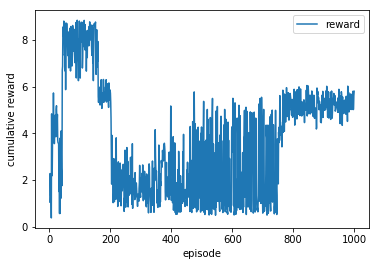

In [14]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['sum'], label='reward')
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.legend()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
The task is to land the quad copter again so that the z = 0.
The reward function first it adds penality value for the high angles move, then calculate the absolute differnece between the current & tagret positions to calculate a decay factor used to penalize the reward to determine by how much are we close to the target.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I used the Deep Deterministic Policy Gradients (DDPG)
- $\alpha$ -> Adam optimizer default LR, $\gamma$ -> 0.75, exploration_mu -> 0, exploration_theta -> 0.075, exploration_sigma = 0.1
- Simple Deep NN with 3 hidden layers first & third layers have 32 nodes but second layer has 64 nodes and all of the hidden layers uses the RELU activation functions, and finally the output layer uses sigmoid.
FYI I used the Actor-Critic technique.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
It's a hard task 
yes it was gradual as you see from the graph the first 200 episodes the reward is approximately 8, from episode 200 to 750 it oscillate from 1 to 5, for the last 200 episodes from ep 800 to ep 1000 the reward is approximately 6

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
I think the whole project is very difficult to me but I learned alot, I faced a problem in getting started then I tried alot to understand the code so I get the idea, then start to make the task enviroment to land, I faced a lot of problems and diffuclties in making the reward function, I searched the internet for the best reward functions that I can use.